# **Logistic Regression**

**Loading dataset**

In [2]:
import pandas as pd
data = 'Sample_Step_dataset.csv'

df = pd.read_csv(data)

**Shape of dataset**

In [3]:
# view dimensions of dataset

df.shape

(2030, 11)

**Column value counts**

In [4]:
print(df.columns.value_counts());

KEY           1
ENTITY        1
D0            1
D1            1
D2            1
D3            1
D4            1
D5            1
D6            1
D7            1
REFERENCES    1
Name: count, dtype: int64


**Drop Entity column**

In [5]:
df.drop(['ENTITY'], axis=1, inplace=True)

**Dataset information**

In [6]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY         2030 non-null   int64  
 1   D0          2030 non-null   float64
 2   D1          2030 non-null   float64
 3   D2          2030 non-null   float64
 4   D3          2030 non-null   float64
 5   D4          2030 non-null   float64
 6   D5          2030 non-null   float64
 7   D6          2030 non-null   float64
 8   D7          2030 non-null   float64
 9   REFERENCES  2030 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 158.7+ KB


In [7]:
df.columns.isnull().sum()

np.int64(0)

In [8]:
df['KEY'].unique()

array([   1,    2,    3, ..., 2032, 2033, 2034])

In [9]:
print(round(df['D0'].describe()),2)

count    2030.0
mean       18.0
std       151.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max      2012.0
Name: D0, dtype: float64 2


**Splitting dataset into X, Y train and test**

In [11]:
X = df.drop(['REFERENCES'], axis=1)
y = df['REFERENCES']

# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Checking the shape of X train and test**

In [12]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1624, 9), (406, 9))

**Tansform X train and test on binary encoder**



In [15]:
!pip install category_encoders
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['D1'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.6 MB/s eta 0:00:00


**Tansform X train and test on scaler transform**

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

**Applying logistic regression on X, Y train dataset**

In [18]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

**Applying logistic regression prediction using X test dataset**

In [19]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]',
       '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]',
       '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]',
       '[]', '[]', '[]', '[]', '[]', '[]', '[]',
       '[1729, 1749, 1949, 1756]', '[]', '[]', '[]', '[]', '[]', '[]',
       '[]', '[2014, 1982, 2016, 2017]', '[]', '[]', '[]', '[]', '[]',
       '[]', '[]', '[]', '[]', '[]', '[3, 876]', '[]', '[]', '[]', '[]',
       '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]',
       '[]', '[]', '[]', '[]', '[]', '[]', '[1729, 1749, 1949, 1756]',
       '[]', '[]', '[1324, 1322, 1321]', '[]', '[]', '[]', '[]', '[]',
       '[]', '[]', '[]', '[]', '[]', '[3, 876]', '[]', '[]', '[]', '[]',
       '[]', '[]', '[]', '[]', '[\\n, 1298, 1294, 1293, 1292]', '[]',
       '[]', '[]', '[]', '[]', '[]', '[]', '[2014, 1982, 2016, 2017]',
       '[]', '[]', '[1990, 2012]', '[453, 434, 255]', '[]', '[]', '[]',
       '[]', '[]

**Applying logistic regression prediction using probability output as 0**


In [20]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.00083586, 0.00111801, 0.00083842, 0.00084475, 0.00081979,
       0.00073363, 0.00073753, 0.00088542, 0.00102299, 0.00113235,
       0.00083034, 0.00169385, 0.00080933, 0.00085096, 0.00083001,
       0.0011463 , 0.00088538, 0.00082088, 0.0004875 , 0.000728  ,
       0.00111293, 0.00111156, 0.00036995, 0.00109173, 0.00055383,
       0.00112615, 0.00078763, 0.00069585, 0.00083653, 0.00083806,
       0.00111055, 0.00108463, 0.00115914, 0.00104714, 0.00113813,
       0.00094737, 0.00111994, 0.00064341, 0.00093877, 0.00108655,
       0.00062535, 0.00148926, 0.0007893 , 0.0010349 , 0.00072568,
       0.00080297, 0.00080371, 0.0008458 , 0.00084763, 0.00112309,
       0.00088615, 0.00078673, 0.00078362, 0.0008879 , 0.00093267,
       0.00116331, 0.00092438, 0.00091606, 0.00110388, 0.00073701,
       0.00083682, 0.00108591, 0.001143  , 0.00109957, 0.00076716,
       0.00108292, 0.00108035, 0.00110729, 0.00080691, 0.00092835,
       0.00116126, 0.00083682, 0.00079026, 0.00071058, 0.00109

**Applying logistic regression prediction using probability output as 1**

In [21]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.00155141, 0.00137451, 0.00151428, 0.00067979, 0.00091778,
       0.00034029, 0.00108664, 0.00101946, 0.00145637, 0.00085377,
       0.00155233, 0.00043013, 0.00091877, 0.00089747, 0.0016922 ,
       0.00135965, 0.00159129, 0.00105291, 0.00037368, 0.00043128,
       0.0013786 , 0.00138012, 0.00021891, 0.00140611, 0.00023959,
       0.00136741, 0.00150688, 0.00110376, 0.00152461, 0.00152254,
       0.00139544, 0.00140352, 0.00133854, 0.00086306, 0.00135694,
       0.00086869, 0.00137283, 0.0003481 , 0.00086884, 0.00140186,
       0.00128654, 0.00041305, 0.00153907, 0.00144625, 0.00019345,
       0.00090983, 0.00092652, 0.00158728, 0.00095104, 0.00085494,
       0.00037442, 0.00093081, 0.00093132, 0.00086872, 0.00038155,
       0.00133464, 0.00086899, 0.00086892, 0.0013867 , 0.00060629,
       0.00152397, 0.00140241, 0.00135245, 0.00139535, 0.00041719,
       0.001405  , 0.00140722, 0.00089797, 0.00091044, 0.00086899,
       0.00133667, 0.00090443, 0.00092164, 0.00109612, 0.00140

**Generate model accuracy**

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.3300


**Logistic regression predict using X train dataset**

In [23]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['[]', '[]', '[1053, 1054, 1055]', ..., '[951, 1657]', '[]', '[]'],
      dtype=object)

**Generate accuracy score of Y and prediction dataset**

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.4704


**Generate logistic regression score using X, Y train and test**

In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.4704
Test set score: 0.3300


**Logistic regression model with Class 100**

In [26]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

**Calculcating test and training score for class 100**



In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8196
Test set score: 0.3374


**Logistic regression model with Class 001**

In [28]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

**Calculcating test and training score for class 001**

In [29]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.3571
Test set score: 0.3300


In [30]:
# check class distribution in test set

y_test.value_counts()

,count
REFERENCES,
[],134
"[3, 876]",3
[1503],2
[1582],2
[1625],2
...,...
[901],1
[1609],1
"[1131, 908]",1


**Calculate null accuracy score**

In [31]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


**Generate confussion matrix of Y test and prediction**

In [32]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 ...
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 134]]

True Positives(TP) =  0

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  0


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

                                                                          precision    recall  f1-score   support

                                                            [1008, 1331]       0.00      0.00      0.00         1
                                                                  [1009]       0.00      0.00      0.00         1
                                                             [1019, 846]       0.00      0.00      0.00         1
                                                            [1024, 1337]       0.00      0.00      0.00         1
                                                      [1029, 1034, 1035]       0.00      0.00      0.00         1
                                                                  [1049]       0.00      0.00      0.00         1
                                                                  [1084]       0.00      0.00      0.00         1
                                                                  [1089]       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

**Confussion matrix for Y test and prediction**

In [34]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 ...
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 134]]

True Positives(TP) =  0

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  0


In [35]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [36]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : nan


/tmp/ipython-input-919122303.py:3: RuntimeWarning: invalid value encountered in divide
  classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)


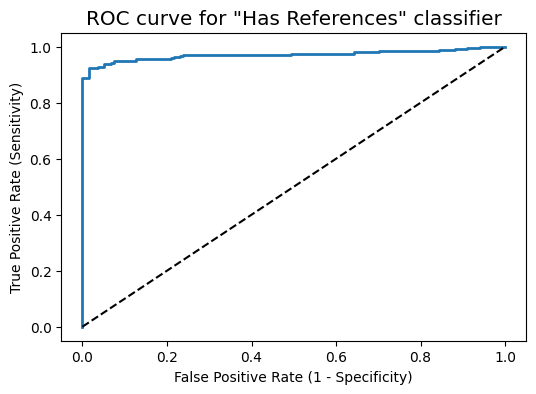

In [38]:
# plot ROC Curve

# Convert y_test to binary labels: 1 if it has references (not '[]'), 0 otherwise
y_test_binary = (y_test != '[]').astype(int)

# Find the index of the '[]' class in the model's classes
# logreg.classes_ contains the unique sorted class labels from the training data
idx_empty_class = None
if '[]' in logreg.classes_:
    idx_empty_class = list(logreg.classes_).index('[]')

# Check if the '[]' class was found
if idx_empty_class is not None:
    # Get the probabilities for the '[]' class
    prob_empty_class = logreg.predict_proba(X_test)[:, idx_empty_class]
    # The probability of having references (the positive class) is 1 - prob_empty_class
    y_score_binary = 1 - prob_empty_class
    pos_label_value = 1 # Because 1 represents 'has references' in y_test_binary

    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_score_binary, pos_label = pos_label_value)

    plt.figure(figsize=(6,4))

    plt.plot(fpr, tpr, linewidth=2)

    plt.plot([0,1], [0,1], 'k--' )

    plt.rcParams['font.size'] = 12

    plt.title('ROC curve for "Has References" classifier')

    plt.xlabel('False Positive Rate (1 - Specificity)')

    plt.ylabel('True Positive Rate (Sensitivity)')

    plt.show()
else:
    print("Error: The '[]' class was not found in the model's learned classes. Cannot plot ROC curve.")

**Logistic regression prediction probability for X test dataset class 0**

In [39]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.00083586, 0.00155141, 0.00101773, ..., 0.0007864 , 0.00079181,
        0.06246855],
       [0.00111801, 0.00137451, 0.00116738, ..., 0.00103652, 0.0010428 ,
        0.03264931],
       [0.00083842, 0.00151428, 0.0010558 , ..., 0.00085362, 0.00084071,
        0.01511312],
       ...,
       [0.00088542, 0.00101946, 0.00087061, ..., 0.0008111 , 0.00081449,
        0.06464991],
       [0.00102299, 0.00145637, 0.00110141, ..., 0.0009459 , 0.00095549,
        0.04506742],
       [0.00113235, 0.00085377, 0.0007693 , ..., 0.00103314, 0.00105236,
        0.13808517]])

**Logistic regression prediction probability for X test dataset class 1**


In [40]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.00155141, 0.00137451, 0.00151428, 0.00067979, 0.00091778,
       0.00034029, 0.00108664, 0.00101946, 0.00145637, 0.00085377])

**Prediction probability for class 1**

In [41]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

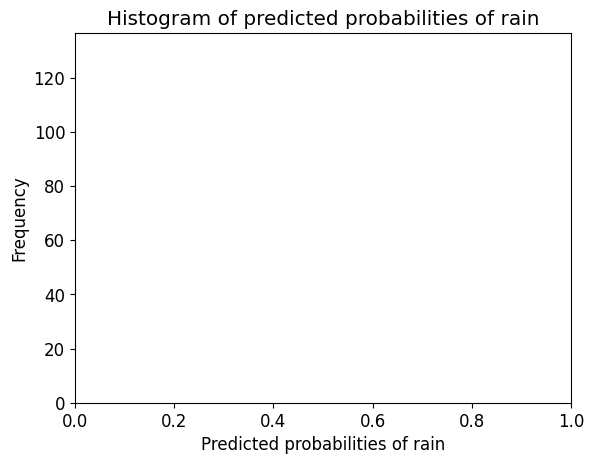

In [42]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

**Confussion matrix of prediction dataset**

In [44]:
from sklearn.preprocessing import Binarizer
import numpy as np # Import numpy

for i in range(1,5):

    # Convert y_test to binary labels: 'Yes' if it has references (not '[]'), 'No' otherwise
    y_test_binary_str = np.where(y_test != '[]', 'Yes', 'No')

    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)

    # Binarize using numpy.where for clarity and compatibility
    # We'll get 1s and 0s first, then convert to 'Yes'/'No'
    y_pred_binary_numeric = np.where(y_pred1 > (i/10), 1, 0)
    y_pred2 = np.where(y_pred_binary_numeric == 1, 'Yes', 'No')

    cm1 = confusion_matrix(y_test_binary_str, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ', '\n\n',

            cm1[1,0],'Type II errors( False Negatives), ', '\n\n',

           'Accuracy score: ', (accuracy_score(y_test_binary_str, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])), '\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[134   0]
 [272   0]] 

 with 134 correct predictions,  

 0 Type I errors( False Positives),  

 272 Type II errors( False Negatives),  

 Accuracy score:  0.33004926108374383 

 Sensitivity:  0.0 

 Specificity:  1.0 



With 0.2 threshold the Confusion Matrix is  

 [[134   0]
 [272   0]] 

 with 134 correct predictions,  

 0 Type I errors( False Positives),  

 272 Type II errors( False Negatives),  

 Accuracy score:  0.33004926108374383 

 Sensitivity:  0.0 

 Specificity:  1.0 



With 0.3 threshold the Confusion Matrix is  

 [[134   0]
 [272   0]] 

 with 134 correct predictions,  

 0 Type I errors( False Positives),  

 272 Type II errors( False Negatives),  

 Accuracy score:  0.33004926108374383 

 Sensitivity:  0.0 

 Specificity:  1.0 



With 0.4 threshold the Confusion Matrix is  

 [[134   0]
 [272   0]] 

 with 134 correct predictions,  

 0 Type I errors( False Positives),  

 272 Type II errors( False Negatives),  



**Plot for Y test and prediction**

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


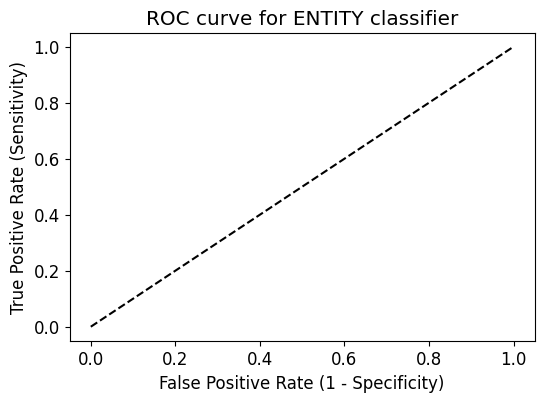

In [45]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for ENTITY classifier')

plt.xlabel('False Positive Rate teSensitivity)')

plt.show()

**Generate cross value score using X,Y train dataset**

In [46]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores:[0.35692308 0.35692308 0.35692308 0.35692308 0.35802469]
